# IMPORTING IMPORTANT LIBRARIES

In [66]:
import matplotlib.pyplot as plt # FOR VISUALIZATION
import numpy as np # FOR HANDLING ARRAYS AND OTHER NUMBER PROCESSING
import sklearn as sk # FOR ACCESSING MACINE LEARNING ALGORITHMS
import pandas as pd # FOR HANDLING CSV(comma seperated values) FILES
import datetime # FOR HANDLING DATES
from sklearn.model_selection import train_test_split # FOR SPLITTING DATASET FOR TRAINING AND TESTING
from sklearn.linear_model import LinearRegression # LINEAR REGRESSION ALGORITHM
from sklearn.neighbors import KNeighborsClassifier # KNN CLASSIFIER ALGORITHM
from sklearn.metrics import accuracy_score # FOR EVALUATION
from sklearn.tree import DecisionTreeRegressor # DECISION TREE ALGORITHM

# READING THE DATASET

In [67]:
dataset = pd.read_csv('NSE-TATAGLOBAL11.csv')
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


CHECKING FOR NULL VALUES

In [68]:
dataset.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1230,False,False,False,False,False,False,False,False
1231,False,False,False,False,False,False,False,False
1232,False,False,False,False,False,False,False,False
1233,False,False,False,False,False,False,False,False


NO NULL VALUES

# EXPLORATORY DATA ANALYSIS (EDA)

# OUR TARGET VARIABLE IS CLOSING PRICE OF EACH DAY

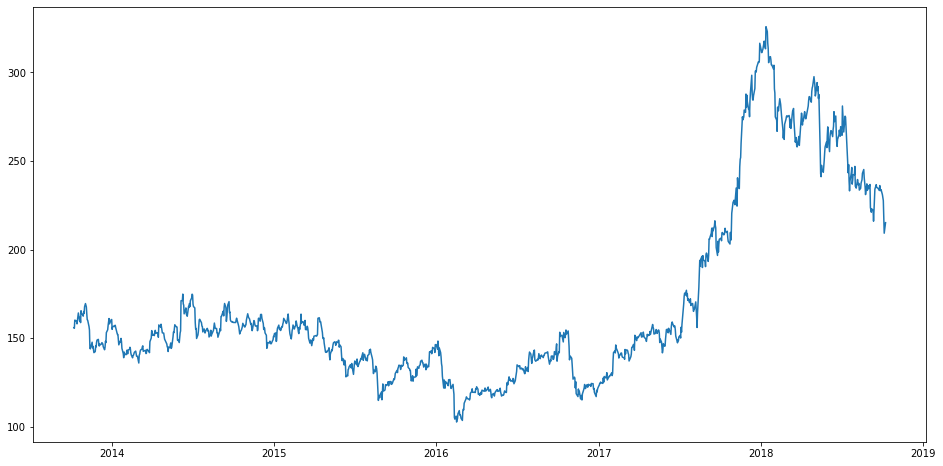

In [69]:
plt.figure(figsize=(16,8))
dates = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dataset['Date']] #converting dates from d/m/y to d-m-y
plt.plot(dates,dataset['Close'])

# OPEN PRICE TREND

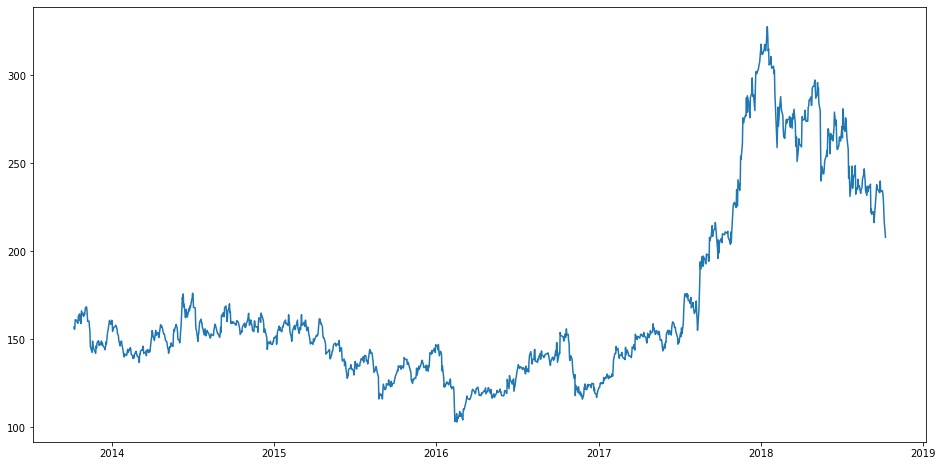

In [70]:
plt.figure(figsize=(16,8))
plt.plot(dates,dataset['Open'])

As we can see that the closing and opening price follow a similar trend. But we want to check the differance between them. At what date there was a significant differance between closing and opening price 

<BarContainer object of 1235 artists>

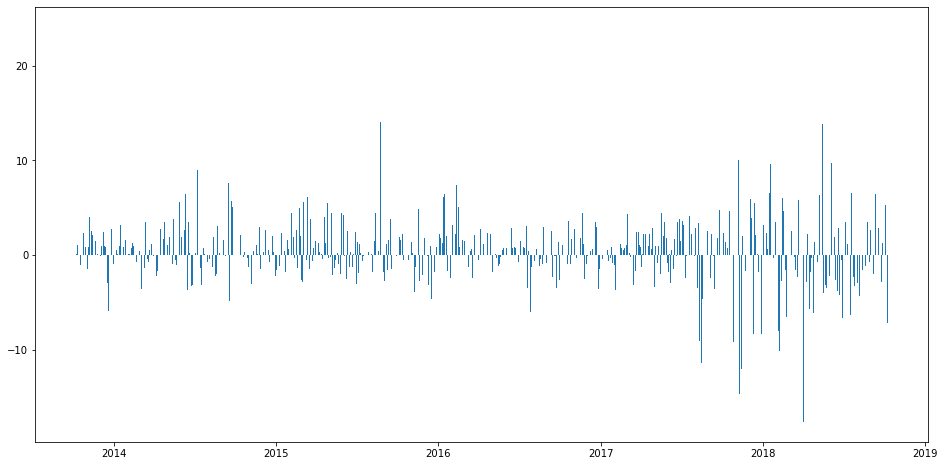

In [71]:
differance = dataset['Open'] - dataset['Close']
plt.figure(figsize=(16,8))
plt.bar(dates,differance)

Now above is a bar chart and it is showing both greater than and less than zero values we can see that it is not much significant at what dates the prices fluctuated. We can try to see and plot the differances values when it is greater than 10 or less than -10 and at what date.

In [72]:
differances = []
my_dates = []
openlist = dataset['Open']
closelist = dataset['Close']
dateslist = dataset['Date']
i=0
differance=0
j=0
while i<len(dataset['Open']):
    differance = closelist[i]-openlist[i]
    if differance >=10 or differance <=-10:
        my_dates.append(dateslist[i])
        differances.append(differance)
    i=i+1

<BarContainer object of 30 artists>

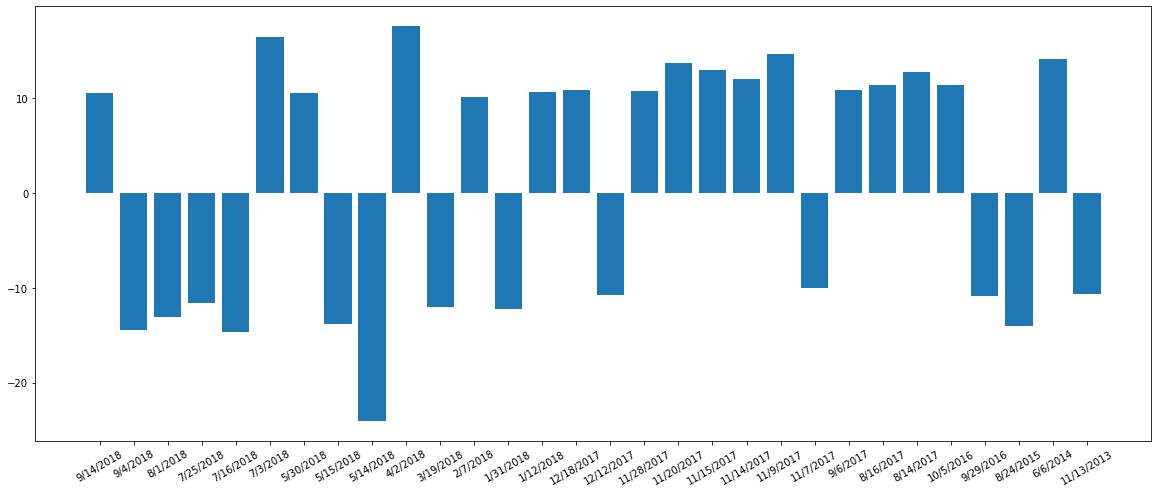

In [73]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=30)
plt.bar(my_dates,differances)

Now it is much clear that at what date the prices fluctuated too much that is greater than 10 or less than -10. we can see that during the year of 2018 and 2017 much of these spiking occured

# THE HIGH COLUMN

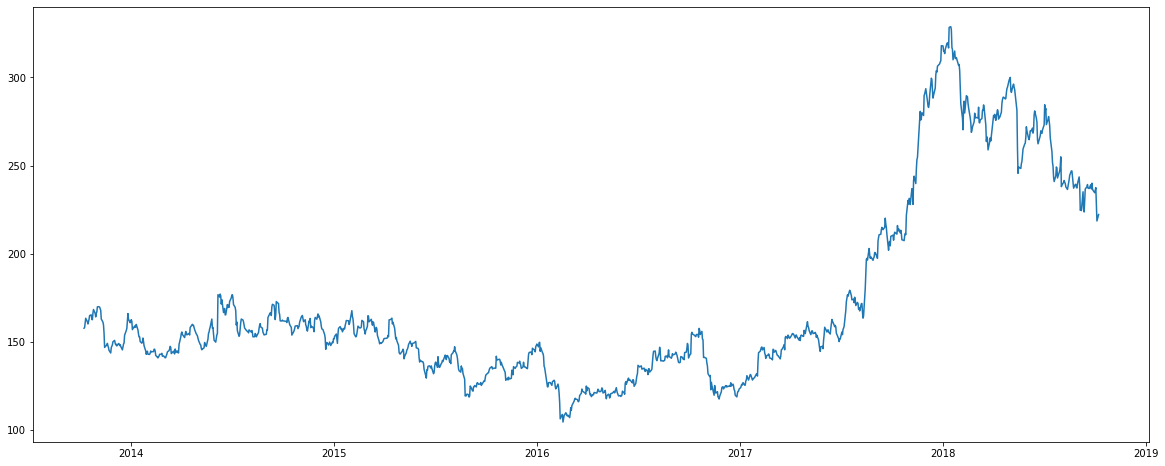

In [74]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['High'])

the trend is same as the closing price as can be seen that from 2017 the prices started going up till 2018

# THE LOW COLUMN

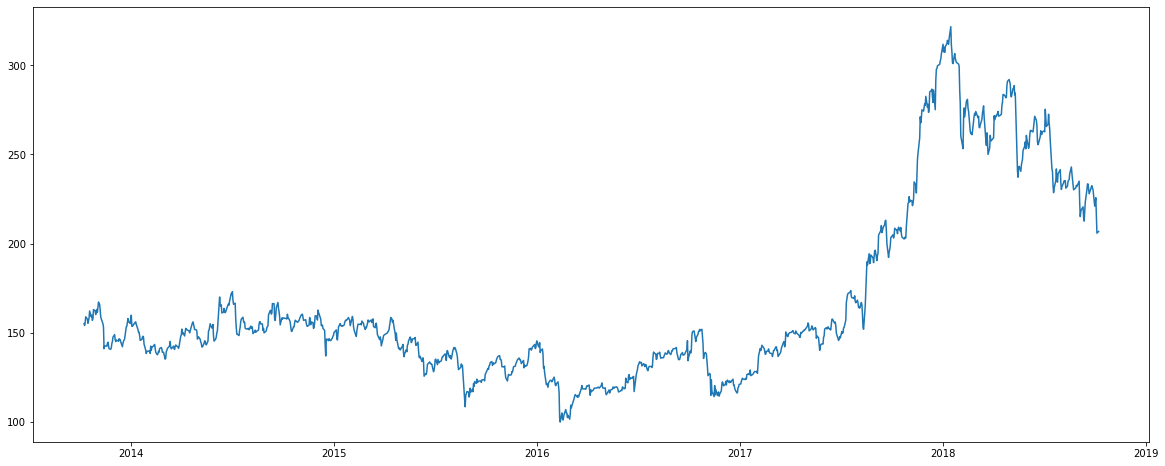

In [75]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['Low'])

the trend is same as the closing price as can be seen that from 2017 the prices started going up till 2018

# THE LAST COLUMN

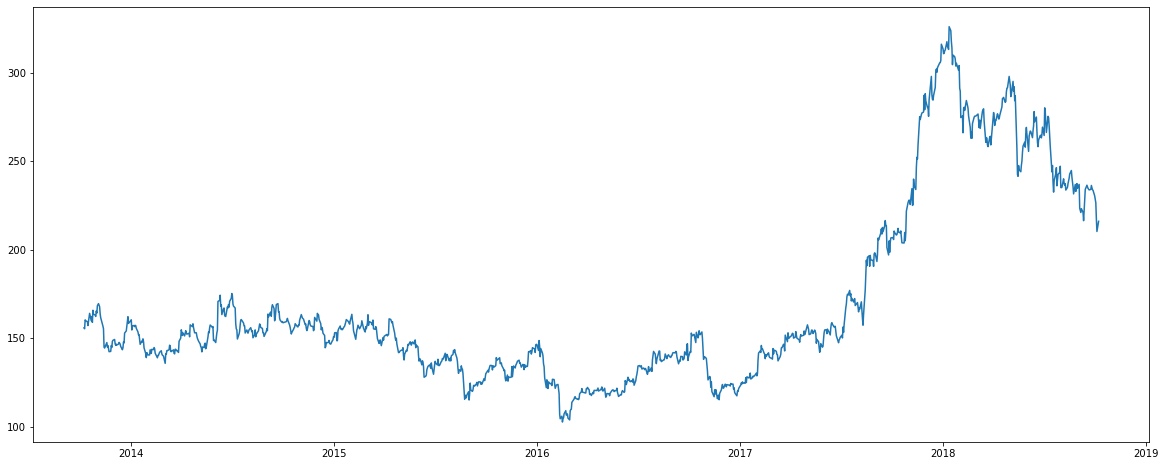

In [76]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['Last'])

the trend is same as the closing price as can be seen that from 2017 the prices started going up till 2018

# THE TURNOVER IN LACS (HUNDRED THOUSANDS)

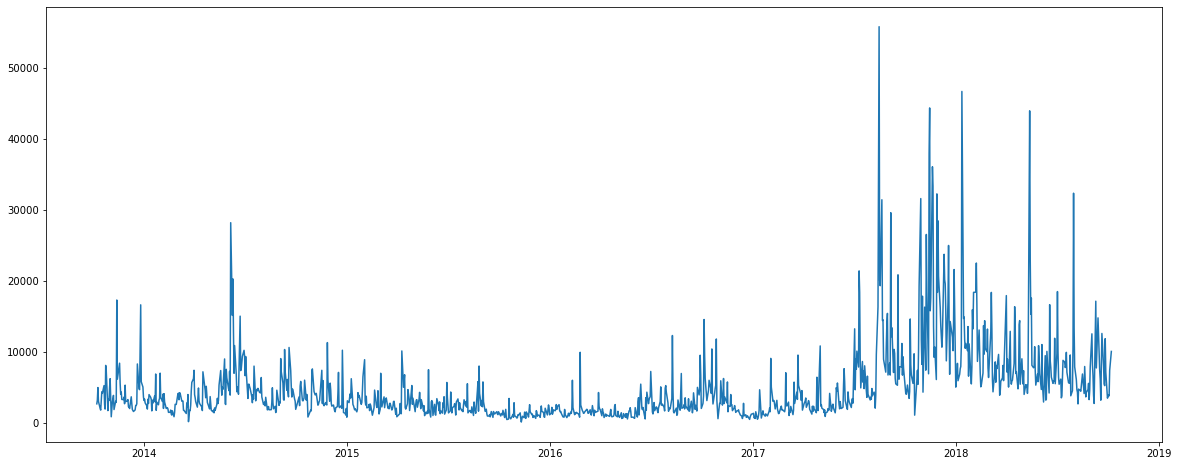

In [77]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['Turnover (Lacs)'])

The total turnover depicts in year 2018 the stocks of this company showed a good turnover.

# THE TOTAL TRADE QUANTITY

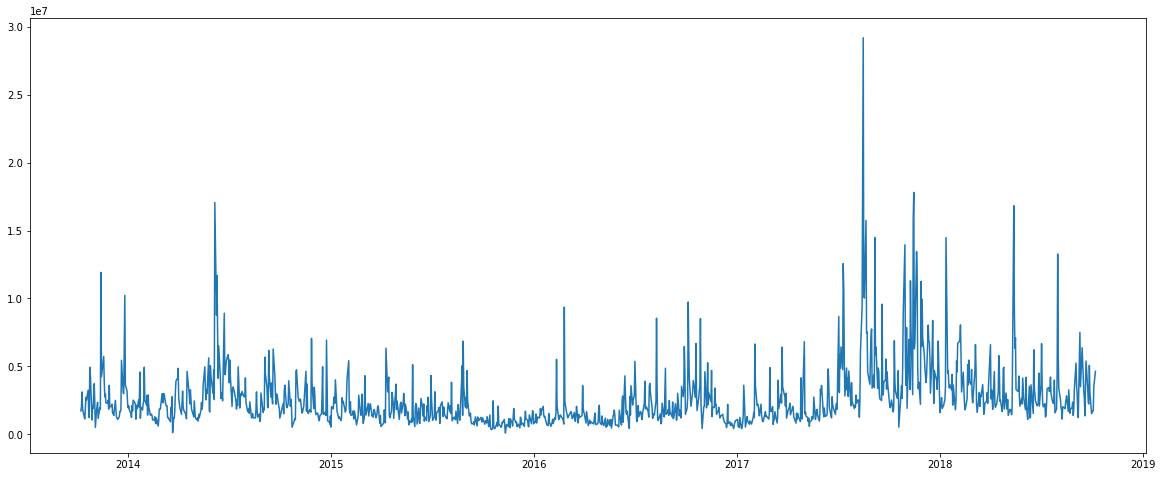

In [78]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['Total Trade Quantity'])

The total turnover depicts in year 2018 the stocks of this company showed a good turnover.

# ALL TOGETHER

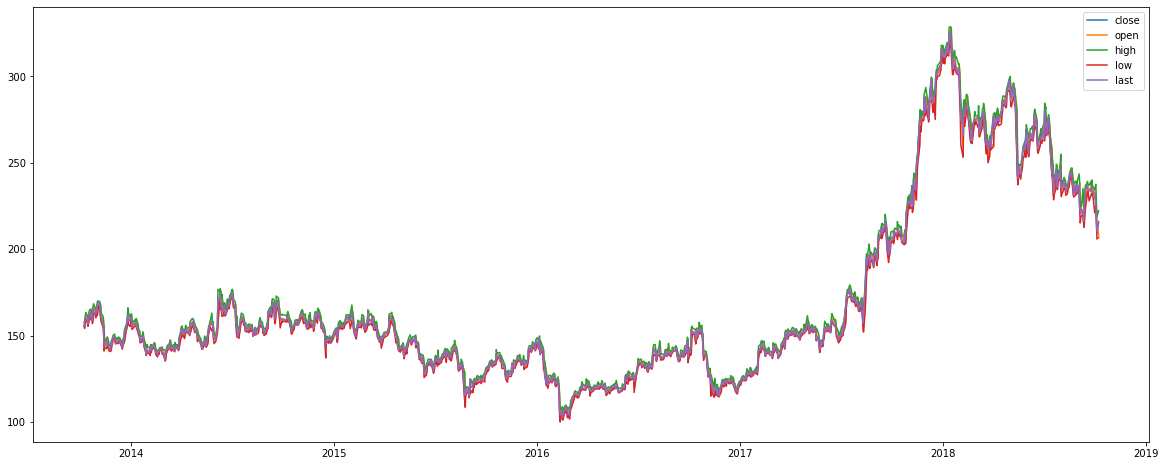

In [79]:
plt.figure(figsize=(20,8))
plt.plot(dates,dataset['Close'] ,label = 'close')
plt.plot(dates,dataset['Open'] ,label = 'open')
plt.plot(dates,dataset['High'] ,label = 'high')
plt.plot(dates,dataset['Low'] ,label = 'low')
plt.plot(dates,dataset['Last'] ,label = 'last')
plt.legend()

As we can see that there is not much change in any of the column's trend over the years.All of the columns graph just overlaps with each other see the legend at the corner.

# DATA MODELLING

# SETTING ASIDE OUR TARGET VARIABLE WHICH IS THE CLOSING PRICE

In [80]:
column_name = 'Close'
close = dataset.pop(column_name)
dataset.insert(1, column_name, close)
dataset.head()

,Date,Close,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,10/8/2018,215.15,208.00,222.25,206.85,216.00,4642146,10062.83
1,10/5/2018,209.20,217.00,218.60,205.90,210.25,3519515,7407.06
2,10/4/2018,218.20,223.50,227.80,216.15,217.25,1728786,3815.79
3,10/3/2018,227.60,230.00,237.50,225.75,226.45,1708590,3960.27
4,10/1/2018,230.90,234.55,234.60,221.05,230.30,1534749,3486.05


# LINEAR REGRESSION

In [81]:
x = dataset.loc[:,'Open':'Turnover (Lacs)'] #Set x as all the columns of the table except closing price
y = dataset['Close'] # Set y as the target variable whcih is closing price

In [82]:
x.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,4642146,10062.83
1,217.00,218.60,205.90,210.25,3519515,7407.06
2,223.50,227.80,216.15,217.25,1728786,3815.79
3,230.00,237.50,225.75,226.45,1708590,3960.27
4,234.55,234.60,221.05,230.30,1534749,3486.05


In [83]:
y.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

splitting the dataset with 90% for training and 10% for testing ratio

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

Call the linear regression

In [85]:
model = LinearRegression()

fit the model

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [87]:
model.score(x_test,y_test)

0.9999270549170569

Checking the score. As we can see that our model is 99 percent accurate. lets predict some values

In [88]:
prediction = model.predict(x_test)
print(prediction)

[153.28075467 223.01900802 153.03308616 133.18717878 317.21481128
 122.48917905 161.70755195 127.71704276 141.16803835 163.41254773
 173.8769534  118.27540863 119.90069404 157.53046599 233.31327184
 119.92122295 243.65409604 302.79030954 153.37823857 159.45083816
 255.59337701 138.65030532 142.79850406 142.39298244 175.21662888
 126.70435761 152.84833821 132.19820966 118.01871663 109.02801046
 141.9686381  153.73038193 106.82274399 244.10010235 153.8825034
 146.07022426 135.93400447 278.4966684  124.0473562  132.80571571
 151.85764672 122.50240593 232.65704321 144.3156242  121.29326064
 151.91459337 148.15586512 169.00850371 277.95019977 119.393226
 237.38757381 139.19988838 160.41035177 119.92496627 158.45718045
 137.23797796 155.19118963 155.31631206 140.21095556 125.29125373
 137.47096376 117.42072778 275.80672715 143.48916631 143.19946979
 137.10833828 156.7517275  233.93298308 154.75597521 147.11250916
 161.29743896 144.11648995 138.57807884 118.68357791 118.39597931
 236.42395475

# K NEAREST NEIGHBORS

set the date from m/d/y to m-d-y

In [89]:
dataset['Date'] = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dataset['Date']]

Make the date as index

In [90]:
dataset.index=dataset['Date']

sort the dataset with respect to date

In [91]:
dataset2 = dataset.sort_index(ascending=True,axis=0)

Make a new data set to store the sorted result excluding the date

In [92]:
dataset3 = pd.DataFrame(index=range(0,len(dataset)),columns=['Close','Open','Last','High','Low','Total Trade Quantity','Turnover'])
for i in range(0,len(dataset)):
    dataset3['Close'][i] = dataset2['Close'][i]
    dataset3['Open'][i] = dataset2['Open'][i]
    dataset3['High'][i] = dataset2['High'][i]
    dataset3['Low'][i] = dataset2['Low'][i]
    dataset3['Last'][i] = dataset2['Last'][i]
    dataset3['Total Trade Quantity'][i] = dataset2['Total Trade Quantity'][i]
    dataset3['Turnover'][i] = dataset2['Turnover (Lacs)'][i]

In [93]:
dataset3.head()

,Close,Open,Last,High,Low,Total Trade Quantity,Turnover
0,155.8,157,155.8,157.8,155.2,1720413,2688.94
1,155.55,155.7,155.3,158.2,154.15,2049580,3204.49
2,160.15,156,160.3,160.8,155.85,3124853,4978.8
3,160.05,161.15,159.8,163.45,159,1880046,3030.76
4,159.45,160.85,159.3,161.45,157.7,1281419,2039.09


Now creating the dataset to store the X values for our knn algorithm. As we can see that the Open , close ,high and low, will effect our prediction so we get their differance as X values

In [94]:
dataset4 = pd.DataFrame(index=range(0,len(dataset)),columns=['Open-Close','High-Low'])

In [95]:
dataset4['Open-Close'] = dataset3['Open'] - dataset3['Close']
dataset4['High-Low'] = dataset3['High'] - dataset3['Low']

In [96]:
dataset4.head()

,Open-Close,High-Low
0,1.2,2.6
1,0.15,4.05
2,-4.15,4.95
3,1.1,4.45
4,1.4,3.75


In [97]:
x = dataset4[['Open-Close','High-Low']]
x.head()

,Open-Close,High-Low
0,1.2,2.6
1,0.15,4.05
2,-4.15,4.95
3,1.1,4.45
4,1.4,3.75


Now the KNN algorithm is a classification algorithm. Here we are using the knn algorithm as whether the funds of next days will be eligible for buying or selling. If tomorrow's closing price is greater than today's closing price we will buy the share or we will sell it. So we are storing +1 for buying and -1 for selling. So the shift fucntion shifts the indexes by desired number of values. Here dataset['Close'].shift(-1) means we need a value from the previous row and and dataset['Close'] means the current row if the previous row value is greater than the next row value we are storing 1 in the numpy array and -1 otherwise.

In [98]:
y = np.where(dataset3['Close'].shift(-1)>dataset3['Close'],1,-1)

In [99]:
y

array([-1,  1, -1, ..., -1,  1, -1])

setting 90% data for training and and 10% for testing

In [100]:
split_ratio = 0.9
split = int(split_ratio*len(dataset4))

x_train = x[:split]
y_train = y[:split]


x_test = x[split:]
y_test = y[split:]

fitting the model and checking the accuracies. Setting 15 neighbors. Which means we are considering 15 values close to our test case and the nearest one will be picked.

In [101]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.5080645161290323

Not a good accuracy we need some other technique

# DECISION TREES

SETTING THE SAME X AND Y

In [102]:
x = dataset3.loc[:,'Open':'Turnover']
y = dataset3.loc[:,'Close']

In [103]:
x.head()

,Open,Last,High,Low,Total Trade Quantity,Turnover
0,157,155.8,157.8,155.2,1720413,2688.94
1,155.7,155.3,158.2,154.15,2049580,3204.49
2,156,160.3,160.8,155.85,3124853,4978.8
3,161.15,159.8,163.45,159,1880046,3030.76
4,160.85,159.3,161.45,157.7,1281419,2039.09


In [104]:
y.head()

0     155.8
1    155.55
2    160.15
3    160.05
4    159.45
Name: Close, dtype: object

SPLITTING THE DATA SET 10% TESTING AND 90% TRAINING

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [106]:
model = DecisionTreeRegressor()

In [107]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [108]:
prediction = model.predict(x_test)

In [109]:
prediction

array([275.5 , 170.6 , 262.85, 130.05, 167.7 , 118.9 , 222.4 , 141.9 ,
       246.9 , 239.1 , 275.  , 122.55, 125.45, 275.5 , 156.8 , 121.4 ,
       146.7 , 161.25, 155.55, 209.2 , 143.6 , 122.  , 245.15, 150.5 ,
       150.5 , 125.4 , 148.3 , 139.7 , 104.  , 118.05, 269.8 , 246.9 ,
       119.45, 158.7 , 275.  , 142.9 , 128.65, 149.75, 138.2 , 145.15,
       263.7 , 132.6 , 154.6 , 137.5 , 137.1 , 149.05, 142.7 , 312.25,
       144.75, 106.65, 146.2 , 137.5 , 147.4 , 109.5 , 154.85, 143.9 ,
       169.2 , 154.75, 251.95, 137.1 , 121.2 , 115.85, 145.4 , 289.7 ,
       146.2 , 140.55, 237.6 , 162.25, 155.65, 276.95, 206.45, 148.2 ,
       148.35, 137.55, 106.65, 154.75, 119.4 , 304.25, 172.2 , 267.95,
       311.2 , 158.45, 314.1 , 154.85, 126.5 , 272.7 , 147.65, 135.8 ,
       233.25, 287.1 , 157.1 , 117.3 , 156.  , 150.2 , 118.05, 275.5 ,
       146.65, 157.45, 262.85, 206.45, 150.5 , 105.25, 198.6 , 144.55,
       117.  , 233.3 , 123.65, 146.4 , 142.7 , 152.5 , 137.65, 152.1 ,
      

In [110]:
model.score(x_test,y_test)

0.9998221783319696

In [111]:
#now lets predict a real world closing price. lets give all the values in to it.
predict = model.predict([[273.9 , 277.8 , 271.65 , 273.9 , 2149205 , 5896.21]])
print(predict)

[277.45]


At the date 4/12/2018 the closing price was 273.85 and our model predicted 277.45 which is quite close.

# LETS VISUALIZE THE DECISION TREE

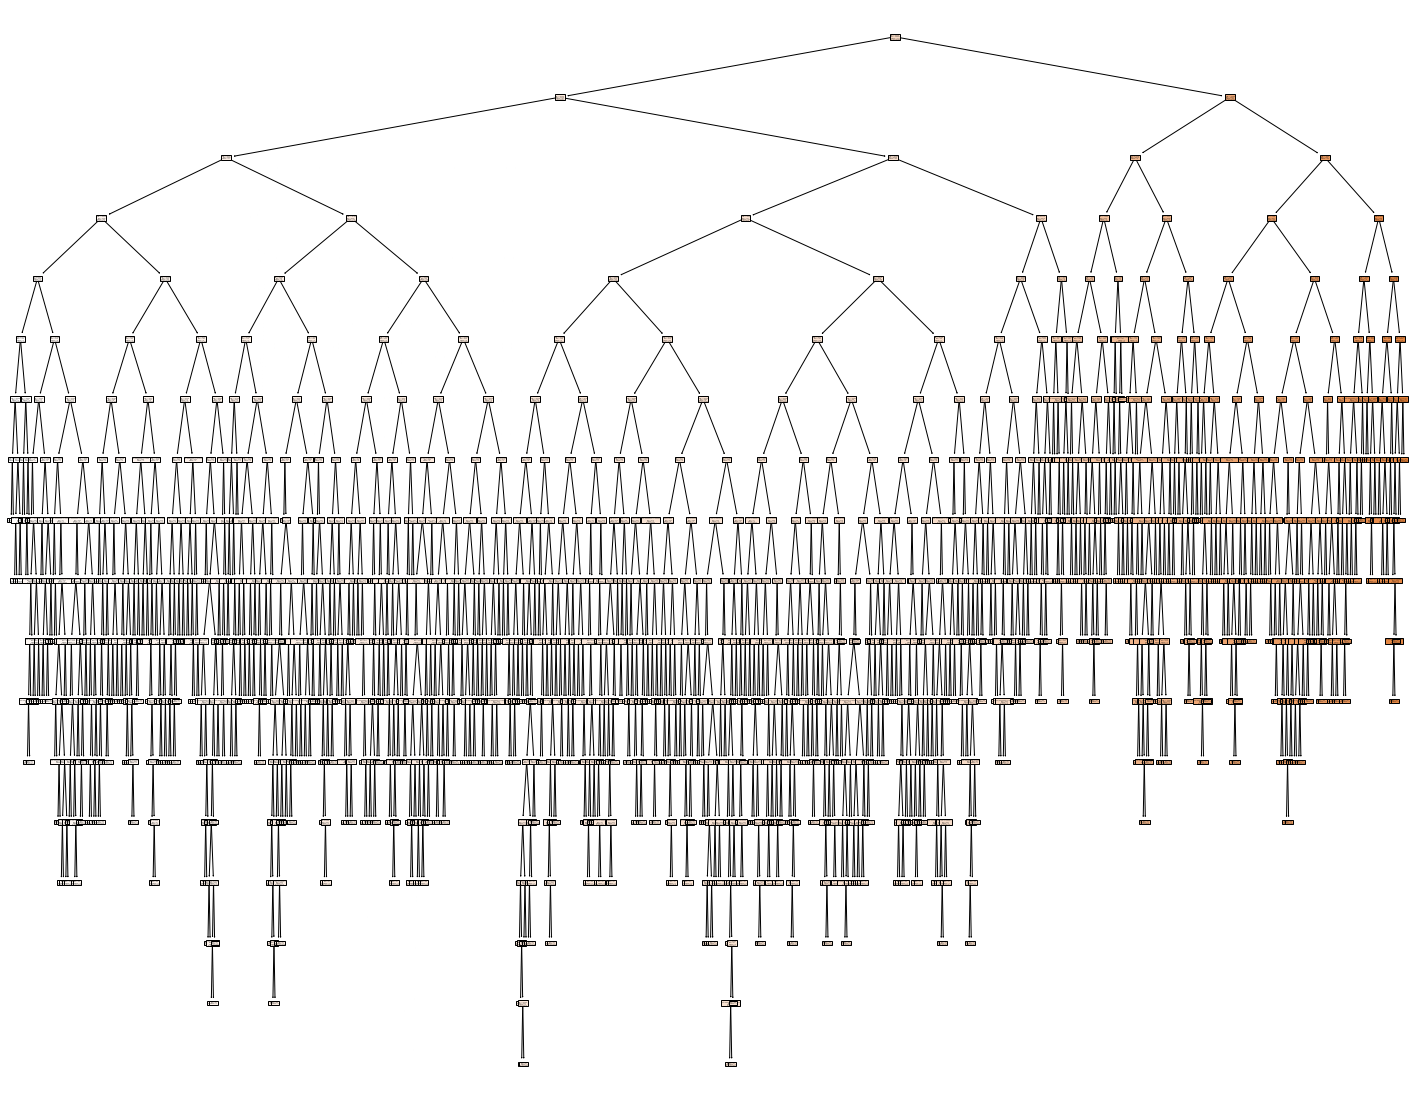

In [216]:
from sklearn import tree
fn = ['Open','High','Low','Last','Turnover','Total Trade Quantity']
cn = ['Close']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
fig.savefig("decision_tree.png")

AS THE DATASET WAS TOO BIG SO IS THE GENERATED DECISION TREE. LETS TRAIN A SMALL DATASET WITH 10 SAMPLES TO SEE THE ACTUAL NODE VALUES

In [61]:
d5 = dataset3[:10]

In [62]:
d5

,Close,Open,Last,High,Low,Total Trade Quantity,Turnover
0,155.8,157,155.8,157.8,155.2,1720413,2688.94
1,155.55,155.7,155.3,158.2,154.15,2049580,3204.49
2,160.15,156,160.3,160.8,155.85,3124853,4978.8
3,160.05,161.15,159.8,163.45,159,1880046,3030.76
4,159.45,160.85,159.3,161.45,157.7,1281419,2039.09
5,158.05,160,157.1,160.2,155.35,1145582,1805.49
6,162,159.1,161.75,162.9,158.25,2724697,4381.6
7,164.2,163.2,164,165,162.25,2540836,4163.49
8,159.6,164.5,159.8,165.35,159,3257249,5252.89
9,161.85,160.4,162.25,162.8,159.9,1598301,2583.68


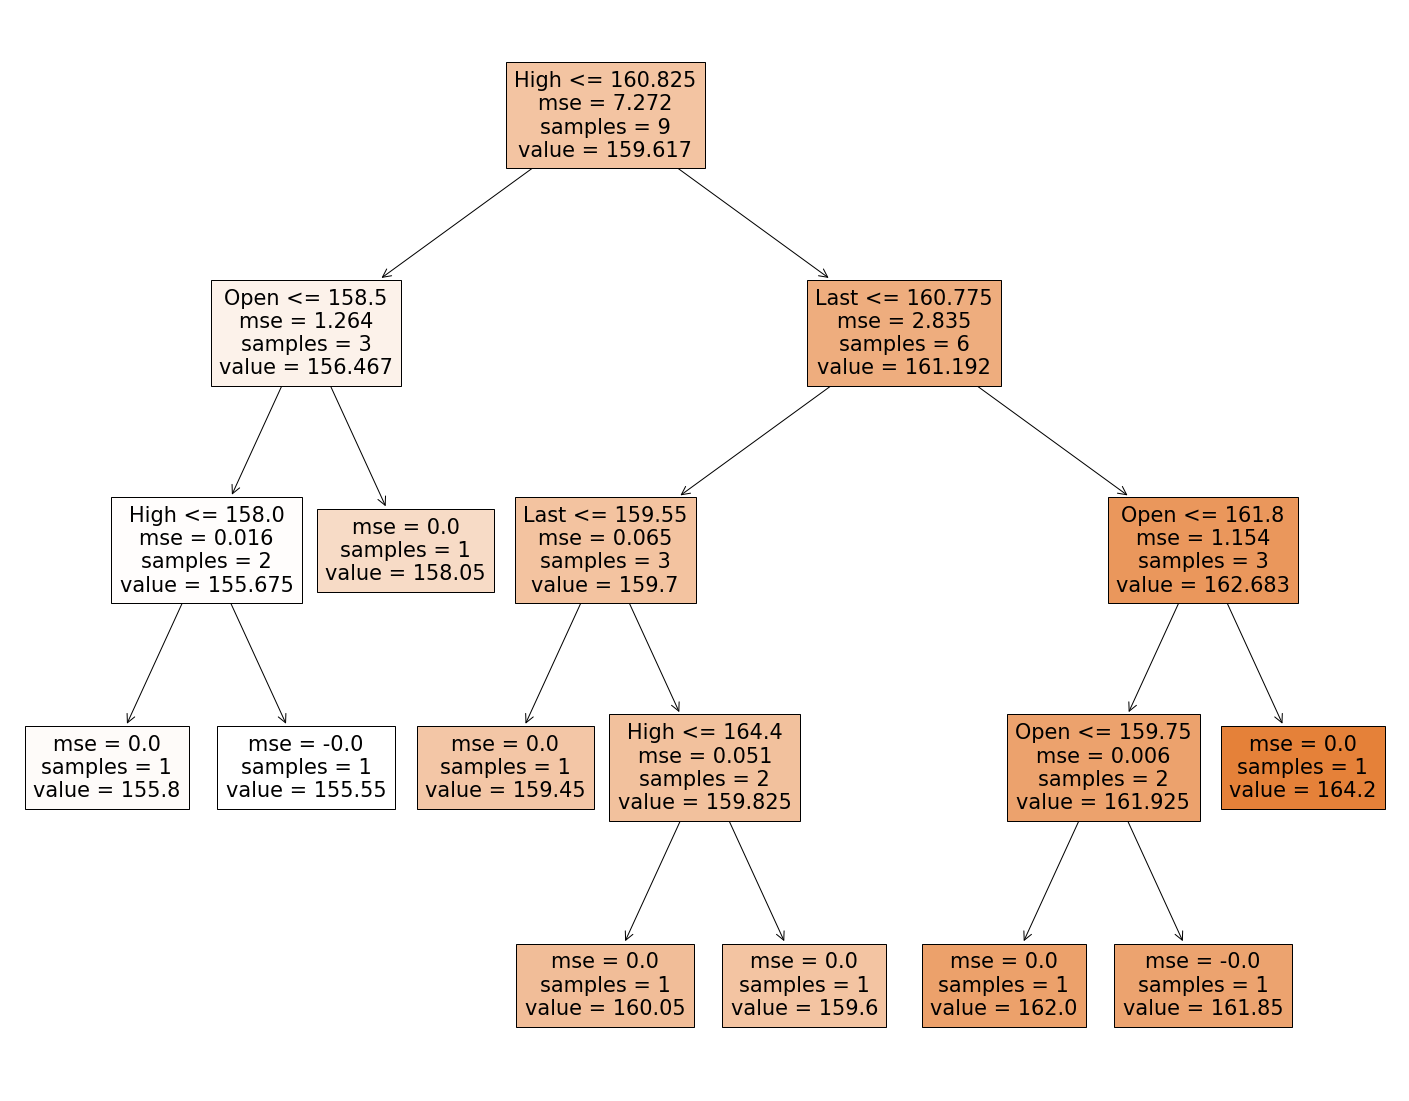

In [63]:
x = d5.loc[:,'Open':'Turnover']
y = d5.loc[:,'Close']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

from sklearn import tree
fn = ['Open','Last','High','Low','Total Trade Quantity','Turnover']
cn = ['Close']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
fig.savefig("decision_tree_small.png")

Now how to read this tree? look at the root value it says there are 9 samples in the dataset if the lowest value of the goes less than 156.525 than go right or else go left. the left node says that there are 3 samples which confirms the low price less than 156.525 and here we are checking the open value and then so on till we reach the leave node which says that the closing price will match the closing price of this sample and the value is also given. the MSE is the mean squared error which is the differance of the actual value and the predicted value.